In [10]:
ds = 'ml100k'
f_name = '_'.join([params_ds.get(ds)[2], 'results.csv'])
"/".join(['..', 'out', f_name])

'../out/ml100k_results.csv'

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
tmp = [2, 3, 4]
tmp.extend([i for i in range(6, 19)])

dict_usecols = {
    'kmeans': [i for i in range(2, 16)],
    'opf': tmp,
    'opf_snn': tmp,
    'user_knn': [i for i in range(2, 15)],
    'dbscan': [i for i in range(2, 18)]
}

In [5]:
datasets = ['amzmagazinesubs', 'ml100k', 'mlsmall']
algorithms = ['kmeans', 'opf', 'opf_snn', 'user_knn', 'dbscan']

In [6]:
output_dir = 'out'

### Creates a csv file that unifies, for each dataset, the results concerning all datasets 

In [7]:
params_ds = {'amzmagazinesubs': [30, 'jaccard', 'amzms'], 'ml100k': [50, 'cosine', 'ml100k'], 'mlsmall': [60, 'squared_euclidean', 'mlls']}

In [109]:
print("Compiling results for:", algorithms)

for ds in datasets:
    
    print("Compiling results of '", ds, "'...", end="")
    df = pd.DataFrame()
  
    for algo in algorithms:

        for f in os.scandir('/'.join(['..', output_dir, ds, algo])):

            # out_file = pd.read_csv(f.path, index_col=1, engine='c', dtype=object)
            # print("Reading file ", f.name)
            out_file = pd.read_csv(f.path, usecols=dict_usecols.get(algo), engine='c')
            out_file.insert(0, "algorithm", [algo] * out_file.shape[0])
               
            if algo == 'kmeans':
                x = [i for i in range(10, 70, 10)]
                x.insert(len(x), params_ds.get(ds)[0])

                out_file.insert(1, "n_neighbors", x)
                out_file.insert(2, "n_neighbors_best", [0] * len(x))

            if algo in ['opf', 'opf_snn']:
                out_file.rename(columns={'kmax': 'n_neighbors', 
                                         'kbest': 'n_neighbors_best', 
                                         'nclusters':'n_clusters'}, inplace=True, copy=False)

            if algo == 'user_knn':
                x = [0] * (out_file.shape[0] - 1)
                x.insert(len(x), params_ds.get(ds)[0])

                out_file.insert(2, "n_neighbors_best", [0] * len(x))
                out_file.insert(3, "n_clusters", [0] * len(x))

                x[len(x) - 1] = params_ds.get(ds)[1]
                out_file.insert(4, "distance", x)
            
            
            if algo == 'dbscan':
                out_file.drop(['eps', 'min_samples'], axis=1, inplace=True)
                out_file.insert(1, "n_neighbors", [params_ds.get(ds)[0]])
                out_file.insert(2, "n_neighbors_best", [0])
            
            df = pd.concat([df, out_file])
    
    f_name = '_'.join([params_ds.get(ds)[2], 'results.csv'])
    df.to_csv("/".join(['..', 'out', f_name]))        
    
    print("... done.")

Compiling results for: ['kmeans', 'opf', 'opf_snn', 'user_knn', 'dbscan']
Compiling results of ' amzmagazinesubs '...... done.
Compiling results of ' ml100k '...... done.
Compiling results of ' mlsmall '...... done.


### Generates latex table considering different metrics

In [80]:
eval_metric = "mae"
datasets[1]

'ml100k'

In [84]:
df = pd.read_csv(params_ds.get(datasets[0])[2] + '_results.csv')
df

,Unnamed: 0,algorithm,n_neighbors,n_neighbors_best,n_clusters,distance,similarity,mae,rmse,ndcg@1,ndcg@5,ndcg@10,precision@1,precision@5,precision@10,recall@1,recall@5,recall@10
0,0,kmeans,10,NaN,129,euclidean,pearson,0.988423,1.176426,0.281250,0.387818,0.528584,0.421875,0.552941,0.677778,0.203125,0.402451,0.658488
1,1,kmeans,20,NaN,99,euclidean,pearson,0.979485,1.170112,0.281250,0.381524,0.520869,0.421875,0.582353,0.733333,0.203125,0.402451,0.658488
2,2,kmeans,30,NaN,93,euclidean,pearson,0.986903,1.176076,0.312500,0.417188,0.561580,0.437500,0.552941,0.677778,0.218750,0.402451,0.658488
3,3,kmeans,40,NaN,85,euclidean,pearson,0.985645,1.171995,0.281250,0.396839,0.529562,0.453125,0.582353,0.733333,0.218750,0.402451,0.658488
4,4,kmeans,50,NaN,79,euclidean,pearson,0.984629,1.171758,0.296875,0.404952,0.540184,0.453125,0.576471,0.733333,0.218750,0.396569,0.658488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0,dbscan,30,NaN,60,jaccard,pearson,1.139721,1.325598,0.375000,0.417013,0.392920,0.406250,0.583333,0.612778,0.171875,0.337500,0.283333
1497,0,dbscan,30,NaN,56,jaccard,pearson,1.023602,1.183028,0.375000,0.402681,0.364942,0.406250,0.585484,0.582353,0.203125,0.315054,0.266176
1498,0,dbscan,30,NaN,61,jaccard,pearson,1.131971,1.315671,0.468750,0.511988,0.450166,0.484375,0.547619,0.531373,0.234375,0.311905,0.241176
1499,0,dbscan,30,NaN,59,jaccard,pearson,1.018913,1.160627,0.390625,0.523989,0.502935,0.437500,0.521078,0.498413,0.218750,0.351471,0.261338


In [85]:
algo = algorithms[1]
algo

'opf'

<AxesSubplot:xlabel='n_neighbors', ylabel='mae'>

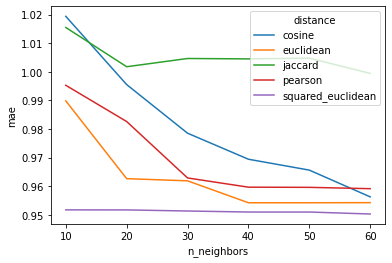

In [87]:
tmp_df = df[['algorithm', 'n_neighbors', 'distance', eval_metric]].query(f"algorithm == '{algorithms[1]}'")
sb.lineplot(data=tmp_df, x='n_neighbors', y=eval_metric, hue='distance', errorbar=None, err_style='band')

<AxesSubplot:xlabel='n_neighbors', ylabel='mae'>

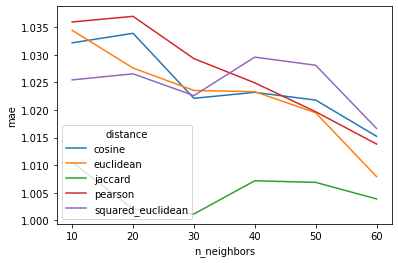

In [88]:
tmp_df = df[['algorithm', 'n_neighbors', 'distance', eval_metric]].query(f"algorithm == '{algorithms[2]}'")
sb.lineplot(data=tmp_df, x='n_neighbors', y=eval_metric, hue='distance', errorbar=None, err_style='band')

In [89]:
tmp_df = df[['algorithm', 'n_neighbors', eval_metric]].query(f"algorithm == '{algorithms[1]}' or algorithm == '{algorithms[2]}'")
tmp_df

,algorithm,n_neighbors,mae
140,opf,10,1.027440
141,opf,10,0.957234
142,opf,10,1.029783
143,opf,10,0.953623
144,opf,10,0.955078
...,...,...,...
1335,opf_snn,60,1.067514
1336,opf_snn,60,1.033327
1337,opf_snn,60,1.032813
1338,opf_snn,60,1.058429


In [90]:
opf_means = tmp_df.groupby(by="n_neighbors").mean()
opf_snn_means = tmp_df.groupby(by="n_neighbors").mean()

<AxesSubplot:xlabel='n_neighbors', ylabel='mae'>

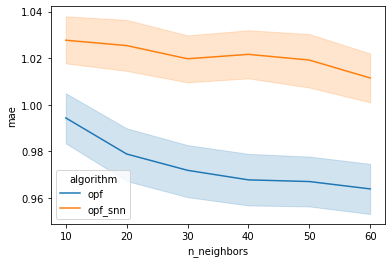

In [91]:
sb.lineplot(data=tmp_df, x='n_neighbors', y='mae', hue='algorithm')

<AxesSubplot:xlabel='n_neighbors', ylabel='mae'>

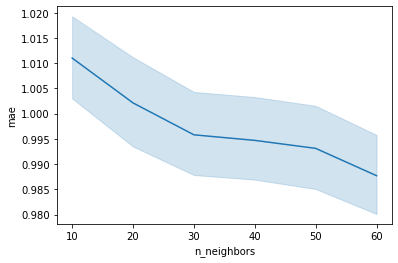

In [92]:
sb.lineplot(data=tmp_df, x='n_neighbors', y='mae')

In [29]:
tmp_df.query(f"algorithm == '{algo}' and n_neighbors == 10")

,algorithm,n_neighbors,mae
0,kmeans,10,0.988423
6,kmeans,10,0.985324
12,kmeans,10,0.988423
18,kmeans,10,0.985324
24,kmeans,10,0.988423
30,kmeans,10,0.983444
36,kmeans,10,0.993142
42,kmeans,10,0.988061
48,kmeans,10,0.988329
54,kmeans,10,0.985324


In [14]:
query_mean = df.query("algorithm == 'kmeans'")[['n_neighbors', 'n_clusters', eval_metric]].groupby(by='n_neighbors').mean()
query_std = df.query("algorithm == 'kmeans'")[['n_neighbors', 'n_clusters', eval_metric]].groupby(by='n_neighbors').std()
query_std

,n_clusters,mae
n_neighbors,,
10,37.724625,0.003096
20,5.556172,0.001814
30,6.442254,0.003599
40,6.640189,0.003771
50,5.458938,0.002498
60,4.549147,0.002588


In [30]:
pd.concat([query_mean, query_std[['mae']]], axis=1)

,n_clusters,mae,mae
n_neighbors,,,
10,158.90,0.987817,0.003096
20,102.35,0.983113,0.001814
30,92.15,0.984218,0.003599
40,87.75,0.984392,0.003771
50,77.30,0.986129,0.002498
60,74.20,0.987188,0.002588
